## High and low pass filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

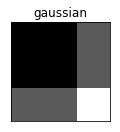

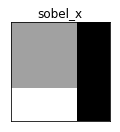

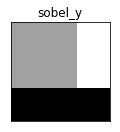

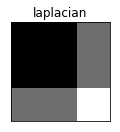

In [4]:
gaussian = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])/16

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Laplacian edge filter

laplacian = np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ["gaussian", "sobel_x", "sobel_y", "laplacian"]

# Perform a FFT on each filter, create a scaled frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in filters]
frequency_tx = [np.log(np.abs(z) + 1) for z in fshift]

# Display the 4 filters

for idx, elem in enumerate(filters):
    plt.subplot(2, 2, idx + 1), plt.imshow(frequency_tx[idx], cmap="gray")
    plt.title(filter_name[idx]), plt.xticks([]), plt.yticks([])

    plt.show()

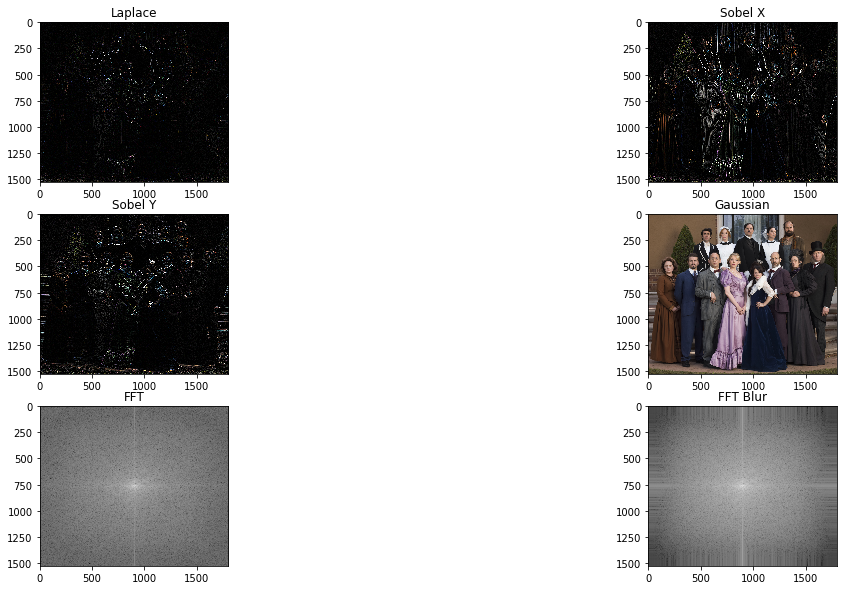

In [24]:
# Fourier transform in real world image

img_new = cv2.imread("images/multi_faces.jpg")

img_new = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)


new_cp = np.copy(img_new)
gray = cv2.cvtColor(new_cp, cv2.COLOR_RGB2GRAY)
norm_gray = gray/255

filter_lp = cv2.filter2D(new_cp, -1, laplacian)
filter_sx = cv2.filter2D(new_cp, -1, sobel_x)
filter_sy = cv2.filter2D(new_cp, -1, sobel_y)
filter_g = cv2.filter2D(new_cp, -1, gaussian)

f = np.fft.fft2(norm_gray)
fshift = np.fft.fftshift(f)
freq_tx = 20*np.log(np.abs(fshift))

f_2 = np.fft.fft2(cv2.GaussianBlur(norm_gray, (3, 3), 0))
fshift2 = np.fft.fftshift(f_2)
freq_tx2 = 20*np.log(np.abs(fshift2))

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 10))

ax1.set_title("Laplace")
ax1.imshow(filter_lp, cmap="gray")
ax2.set_title("Sobel X")
ax2.imshow(filter_sx, cmap="gray")

ax3.set_title("Sobel Y")
ax3.imshow(filter_sy, cmap="gray")
ax4.set_title("Gaussian")
ax4.imshow(filter_g, cmap="gray")

ax5.set_title("FFT")
ax5.imshow(freq_tx, cmap="gray")
ax6.set_title("FFT Blur")
ax6.imshow(freq_tx2, cmap="gray");